In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import urllib.request
import zipfile
%matplotlib inline

In [2]:
archive_name = "indic-struct-distrib-revenu-2015-SUPRA.zip"
subarchive_name = "indic-struct-distrib-revenu-2015-METROPOLE.zip"
file_name = "FILO_DISP_METROPOLE.xls"

In [3]:
print("downloading file ...")
urllib.request.urlretrieve(
    "https://www.insee.fr/fr/statistiques/fichier/3560118/indic-struct-distrib-revenu-2015-SUPRA.zip", 
    archive_name
)
print("fully ownloaded !")

downloading file ...
fully ownloaded !


In [4]:
def extract(path, member):
    print("extracting all from %s ..." % path)
    with zipfile.ZipFile(path, 'r') as zip_ref:
        zip_ref.extract(member, "./")
    print("done extracting !")

    
extract(archive_name, subarchive_name)
extract(subarchive_name, file_name)

extracting all from indic-struct-distrib-revenu-2015-SUPRA.zip ...
done extracting !
extracting all from indic-struct-distrib-revenu-2015-METROPOLE.zip ...
done extracting !


In [5]:
df = pd.read_excel(
    "FILO_DISP_METROPOLE.xls", 
    sheet_name="ENSEMBLE",
    header=0,
    index_col=1,
    skiprows=[0,1,2,3,5]
)
df.head()

,Code géographique,Nbre de ménages fiscaux,Nbre de personnes dans les ménages fiscaux,Nbre d'unités de consommation dans les ménages fiscaux,1er quartile (€),Médiane (€),3e quartile (€),Écart interquartile (€),1er décile (€),2e décile (€),...,dont part des indemnités chômage (%),"dont part des salaires, traitements hors chômage (%)",dont part des revenus des activités non salariées (%),"Part des pensions, retraites et rentes (%)",Part des revenus du patrimoine et autres revenus (%),Part de l'ensemble des prestations sociales (%),dont part des prestations familiales (%),dont part des minima sociaux (%),dont part des prestations logement (%),Part des impôts (%)
Libellé géographique,,,,,,,,,,,,,,,,,,,,,
France métropolitaine,1,27071573,62770585.5,4.274229e+07,14976.666667,20565.555556,27670,12693.333333,10739,13743,...,3.2,64.3,5.6,28.3,10.6,5.3,2.1,1.7,1.4,-17.4


In [6]:
df2 = pd.DataFrame(
    [
        [df['1er décile (€)']['France métropolitaine']],
        [df['2e décile (€)']['France métropolitaine']],
        [df['1er quartile (€)']['France métropolitaine']],
        [df['3e décile (€)']['France métropolitaine']],
        [df['4e décile (€)']['France métropolitaine']],
        [df['Médiane (€)']['France métropolitaine']],
        [df['6e décile (€)']['France métropolitaine']],
        [df['7e décile (€)']['France métropolitaine']],
        [df['3e quartile (€)']['France métropolitaine']],
        [df['8e décile (€)']['France métropolitaine']],
        [df['9e décile (€)']['France métropolitaine']]
    ], 
    index=[0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, .8, .9], 
    columns=["France Métropolitaine - 2015"]
)
df2 = df2.assign(label=[
    '1er décile - 10%', '2e décile - 20%', '1er quartile - 25%', 
    '3e décile - 30%', '4e décile - 40%', 'Médiane - 50%', 
    '6e décile - 60%', '7e décile - 70%', '3e quartile - 80%', 
    '8e décile - 80%', '9e décile - 90%'
])
df2

,France Métropolitaine - 2015,label
0.10,10739.000000,1er décile - 10%
0.20,13743.000000,2e décile - 20%
0.25,14976.666667,1er quartile - 25%
0.30,16153.448276,3e décile - 30%
0.40,18391.000000,4e décile - 40%
0.50,20565.555556,Médiane - 50%
0.60,22917.500000,6e décile - 60%
0.70,25806.923077,7e décile - 70%
0.75,27670.000000,3e quartile - 80%
0.80,29978.000000,8e décile - 80%


<Figure size 600x600 with 0 Axes>

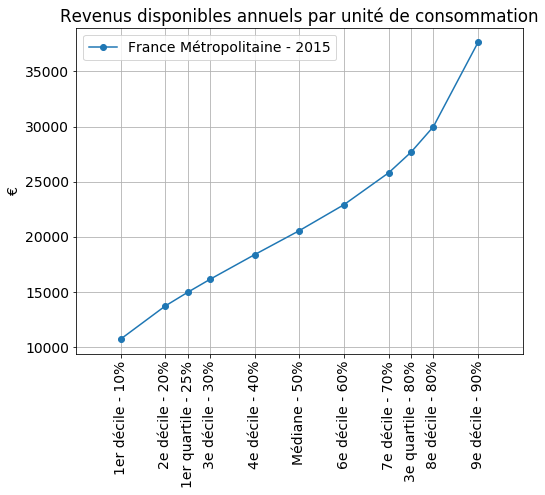

<Figure size 600x600 with 0 Axes>

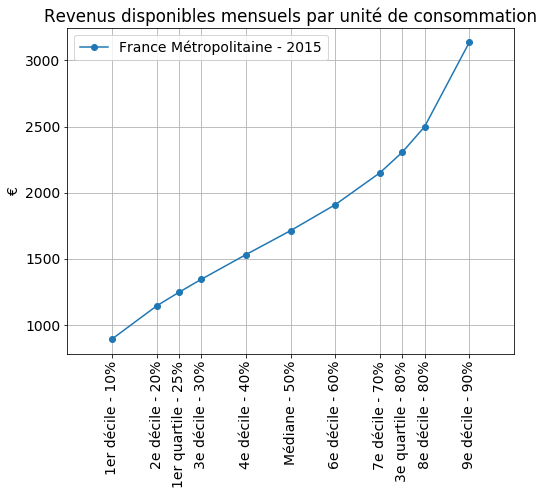

In [7]:
plt.rcParams['figure.figsize'] = [8, 6]
font = {'size': 14}
matplotlib.rc('font', **font)

def chart(df, ylabel):
    plt.figure(figsize=(1,1), dpi=600)
    ax = df.plot(kind="line", marker="o", grid=True, legend=True)
    ax.set_ylabel("€")
    ax.set_title(ylabel)
    ax.set_xticks(df.index.tolist())
    ax.set_xlim([0,1])
    ax.set_xticklabels(df.label, rotation=90)

    
chart(df2, "Revenus disponibles annuels par unité de consommation")
df3 = df2.copy()
df3['France Métropolitaine - 2015'] = df3['France Métropolitaine - 2015'] / 12
chart(df3, "Revenus disponibles mensuels par unité de consommation")